In [ ]:
!pip install pandas scikit-learn numpy matplotlib seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [48]:
# 1 - Visualização do conteúdo do dataset
dados = pd.read_csv("data.csv")
dados.head(30)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,0
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,0
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0


In [49]:
# Selecionando as colunas relevantes
colunas_numericas = ['Age', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
# Coluna alvo
coluna_alvo = "MetabolicSyndrome"
# filtragem das colunas numéricas
dados[colunas_numericas] = dados[colunas_numericas].fillna(dados[colunas_numericas].mean())
dados = dados[[coluna_alvo] + colunas_numericas]

# Calculando e exibindo a tabela de correlação
correlacao = dados.corr()
correlacao

,MetabolicSyndrome,Age,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
MetabolicSyndrome,1.000000,0.248618,0.490490,0.428976,0.158501,0.085168,0.246423,0.362219,-0.371378,0.427241
Age,0.248618,1.000000,0.220881,0.079479,0.233464,0.118380,0.147928,0.236610,0.079368,0.069885
WaistCirc,0.490490,0.220881,1.000000,0.882640,0.117564,0.042029,0.347906,0.250168,-0.342227,0.230946
BMI,0.428976,0.079479,0.882640,1.000000,0.076169,0.038048,0.269618,0.208784,-0.290774,0.163208
Albuminuria,0.158501,0.233464,0.117564,0.076169,1.000000,0.536214,0.176760,0.198642,-0.024188,0.107842
UrAlbCr,0.085168,0.118380,0.042029,0.038048,0.536214,1.000000,0.130928,0.106458,0.001667,0.077873
UricAcid,0.246423,0.147928,0.347906,0.269618,0.176760,0.130928,1.000000,0.055943,-0.252587,0.207328
BloodGlucose,0.362219,0.236610,0.250168,0.208784,0.198642,0.106458,0.055943,1.000000,-0.213905,0.269506
HDL,-0.371378,0.079368,-0.342227,-0.290774,-0.024188,0.001667,-0.252587,-0.213905,1.000000,-0.388487
Triglycerides,0.427241,0.069885,0.230946,0.163208,0.107842,0.077873,0.207328,0.269506,-0.388487,1.000000


<Axes: >

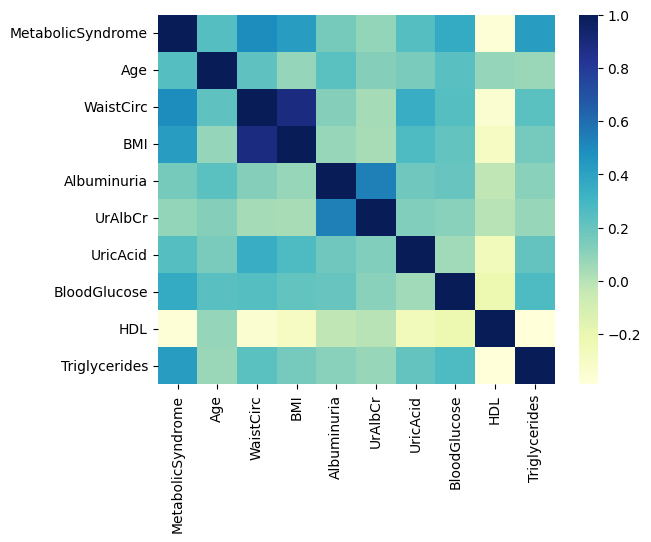

In [50]:
# Mapa de calor da correlação
sns.heatmap(correlacao, 
            xticklabels=correlacao.columns,
            yticklabels=correlacao.columns,
            cmap="YlGnBu"
)

In [51]:
# Dimensão dos dados selecionados
print(dados.shape)

(2401, 10)


In [52]:
# Separando as variáveis independentes (X) e a variável dependente (y)
X = dados[colunas_numericas]
y = dados[coluna_alvo]

# Padronizando os dados para o PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Aplicando o PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Examinando a variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:")
print(explained_variance_ratio)



Variância explicada por cada componente principal:
[0.29959263 0.17742771 0.12676832 0.11349129 0.09493348 0.06729016
 0.05978722 0.04959078 0.01111841]


In [54]:
# variância das componentes principais acumulativa
pca.explained_variance_ratio_.cumsum()

array([0.29959263, 0.47702034, 0.60378866, 0.71727995, 0.81221343,
       0.87950359, 0.93929081, 0.98888159, 1.        ])

In [55]:
# Escolhendo o número de componentes principais a serem mantidos
n_components = 3
X_pca = X_pca[:, :n_components]

# Adicionando as componentes principais ao DataFrame
for i in range(n_components):
    dados[f'PC{i+1}'] = X_pca[:, i]

In [56]:
# Visualizando as maiores autovalores e autovetores
eigenvalues = pca.explained_variance_# variância das componentes principais acumulativa
pca.explained_variance_ratio_.cumsum()

# Escolhendo o número de componentes principais a serem mantidos
n_components = 3
X_pca = X_pca[:, :n_components]

# Adicionando as componentes principais ao DataFrame
for i in range(n_components):
    dados[f'PC{i+1}'] = X_pca[:, i]
eigenvectors = pca.components_

print("autovalores:",  eigenvalues)
print("autovetores:",  eigenvectors)

autovalores: [2.69745717 1.59751474 1.14139023 1.02184721 0.8547573  0.60586381
 0.53830918 0.44650299 0.10010738]
autovetores: [[ 0.19902105  0.50868515  0.4642411   0.23032726  0.16779264  0.32969422
   0.29940045 -0.3335565   0.30871732]
 [ 0.31164815 -0.2263488  -0.26758498  0.59527613  0.58400529  0.01531499
   0.12540025  0.25789319 -0.04642641]
 [-0.31865865 -0.34919549 -0.37684689  0.01732992  0.05903687 -0.01862812
   0.21461951 -0.48264747  0.59275863]
 [-0.54668477  0.03128659  0.10482646  0.17334979  0.34518985  0.37075411
  -0.60695118 -0.13461457 -0.12646227]
 [-0.47938472  0.137325    0.29045962  0.14063928  0.25036479 -0.68747387
   0.29046948 -0.0204207  -0.16460123]
 [ 0.20902403  0.13582635  0.12589806 -0.02071079  0.10025134 -0.41927725
  -0.54373021  0.21998822  0.62585925]
 [-0.39513398  0.00282254  0.09072383 -0.10596001 -0.00321285  0.31865812
   0.30483167  0.71923082  0.33561017]
 [ 0.14056936 -0.01323268 -0.00691651 -0.72849105  0.65941491  0.0380058
   0.084

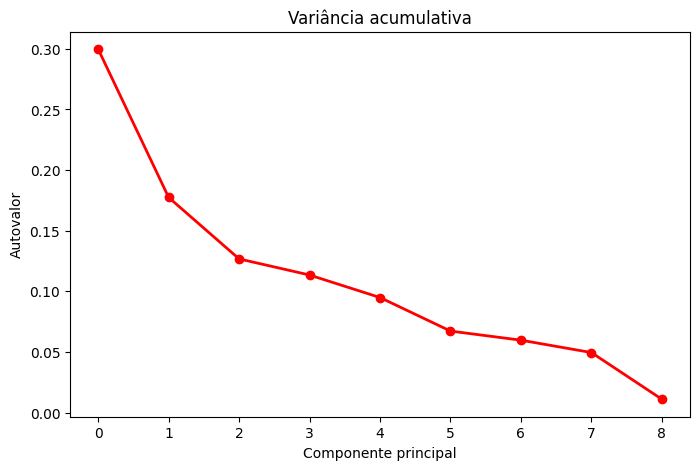

In [57]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Variância acumulativa")
plt.xlabel("Componente principal")
plt.ylabel("Autovalor")
plt.show()

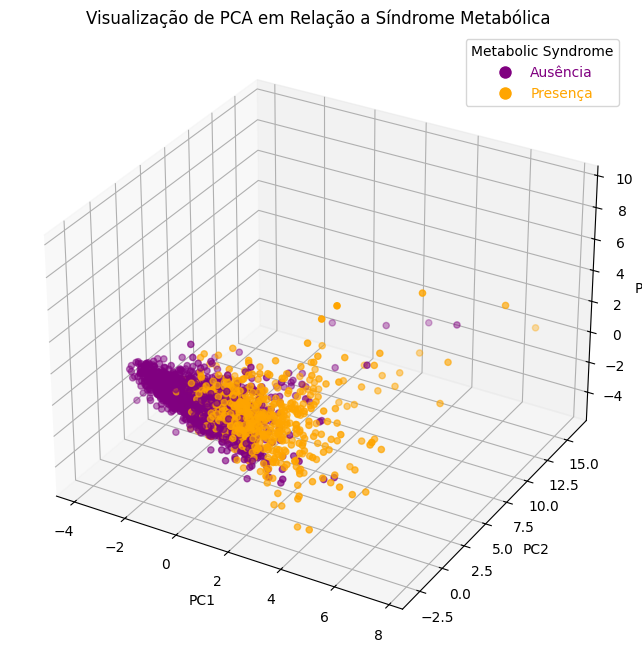

In [63]:
# Criando um mapa de cores personalizado com roxo para 0 e laranja para 1
custom_cmap = plt.cm.colors.ListedColormap(['purple', 'orange'])

# Plotando as componentes principais em 3D com cores que indicam a relação com a síndrome metabólica
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=custom_cmap)

# Mapeando os valores 0 e 1 para "Ausência" e "Presença" na legenda
legend_labels = {0: 'Ausência', 1: 'Presença'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                             markerfacecolor=color, markersize=10) for label, color in zip(legend_labels.values(), ['purple', 'orange'])]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualização de PCA em Relação à Síndrome Metabólica')
legend = ax.legend(handles=legend_handles, title='Metabolic Syndrome')

# Ajustando as cores do texto da legenda
for text, color in zip(legend.get_texts(), ['purple', 'orange']):
    text.set_color(color)

plt.show()